In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/processed_transaction.csv')

Not Fraud: 622954
Fraud: 10892
Proportion: 57.19 : 1


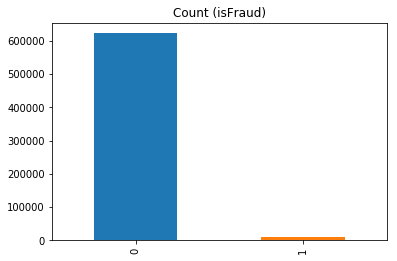

In [3]:
target_count = df['isFraud'].value_counts()
print('Not Fraud:', target_count[0])
print('Fraud:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (isFraud)');

This shows data is highly imblance as 'Not Fraud': 'Fraud' ration is 57.19 : 1

#### The metric trap
One of the major issues that users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate

#### Lets do an experiments 

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = df.drop(['isFraud'],axis=1), df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


Now let's run the same code, but using only one feature 'merchantName' (which should drastically reduce the accuracy of the classifier):

In [5]:
model = XGBClassifier()
model.fit(X_train[['merchantName']], y_train)
y_pred = model.predict(X_test[['merchantName']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.25%


The high accuracy rate was just an illusion. In this way, the choice of the metric used in unbalanced datasets is extremely important.

#### Confusion matrix

An interesting way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect predictions for each class. In the first row, the first column indicates how many classes 0 were predicted correctly, and the second column, how many classes 0 were predicted as 1. In the second row, we note that all class 1 entries were erroneously predicted as class 0.

In [6]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[124548      0]
 [  2222      0]]


#### Resampling
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

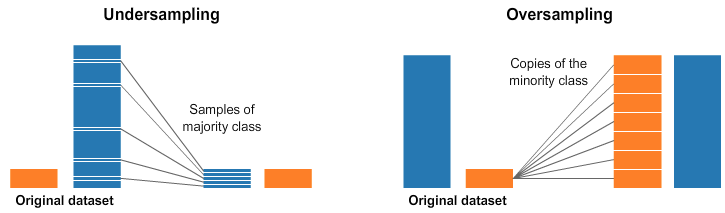


Lets over undersample Large feature(Not Fraud)  to  the small feature(Fraud)

In [7]:
# Class count
count_class_0, count_class_1 = df['isFraud'].value_counts()

# Divide by class
df_class_0 = df[df['isFraud'] == 0]
df_class_1 = df[df['isFraud'] == 1]

# under sample class 0(not fraud) to 70%
df_class_0_under = df_class_0.sample(df_class_1.shape[0], replace=True, random_state=42)

# now concat two feature
df_balance_over = pd.concat([df_class_0_under, df_class_1], axis=0)
df_balance_over.shape

(21784, 34)

Random over-sampling:
1    10892
0    10892
Name: isFraud, dtype: int64


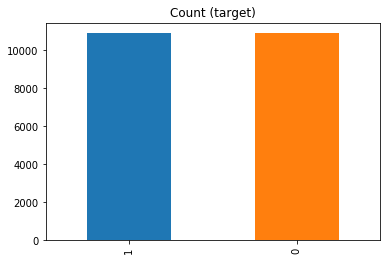

In [8]:

print('Random over-sampling:')
print(df_balance_over['isFraud'].value_counts())

df_balance_over['isFraud'].value_counts().plot(kind='bar', title='Count (target)');

#### Now save this balance data

In [9]:
df_balance_over.to_csv('../data/processed_balanced_transaction.csv', index=False)

#### Code Reference 

- https://machinelearningmastery.com/resample-interpolate-time-series-data-python/
- https://towardsdatascience.com/https-towardsdatascience-com-resampling-methods-for-unbalanced-datasets-5b565d0a247d
- https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html